## **Importing libraries**

In [1]:
!pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import seaborn as sbs
import statistics as st

## **connect to google drive**

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **reading csv dataset from drive**

In [4]:
data=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/diabetes.csv')
datacpy=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/diabetes.csv')

In [5]:
datacpy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **feature engineering**

In [6]:
# handeling missing values
# isnull is a function that write true in cell that value is nan
# print( type(data.isnull())) = <class 'pandas.core.frame.DataFrame'>
# print( type(data.isnull().values)) = <class 'numpy.ndarray'>
# any function return true if there is even one 'true'
# so at first we change our dataset to false and true . nan change to true other values change to false using isnull
#then change pandas to numpy arr using .values
# finall use any function to return true if finds a true . so if the result is false that means we dont have missing value


datacpy.isnull().values.any()

False

In [7]:
#handeling outliers using IQR
# at first find which columns have outlier using  boxplot
dataColumns=data.columns
print(dataColumns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [8]:
#replacing  outliers with median and zero values with mean
cols=dataColumns[0:8]
def handleOutLiers_MissingValues(dt):
  for x in cols:
    print(x)
    median=st.median(dt[x].to_list())
    mean=st.mean(dt[x].to_list())
    # print('median : ', median , x)
    # print('mean : ', mean , x)
    Q1=dt[x].quantile(0.25)
    Q3=dt[x].quantile(0.75)
    IQR=Q3-Q1
    lowerBound=Q1 -(1.5 * IQR)
    upperBound=Q3 +(1.5 * IQR) 
    dt.loc[dt[x]<lowerBound , x] = median
    dt.loc[dt[x]>upperBound , x] = median
    dt.loc[dt[x]==0 ,x]=mean




In [9]:
handleOutLiers_MissingValues(data)


Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age


In [10]:
data.head()
# this data now is clear from outliers and missing values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.6270,50.0,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.3510,31.0,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.6720,32.0,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.1670,21.0,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,0.3725,33.0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


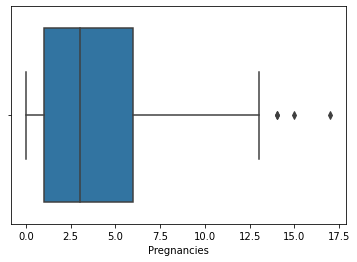

In [11]:
sbs.boxplot(datacpy[dataColumns[0]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


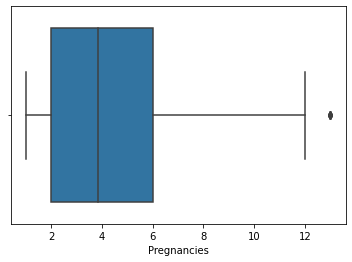

In [12]:
sbs.boxplot(data[dataColumns[0]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


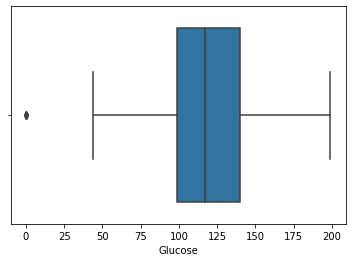

In [13]:
sbs.boxplot(datacpy[dataColumns[1]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


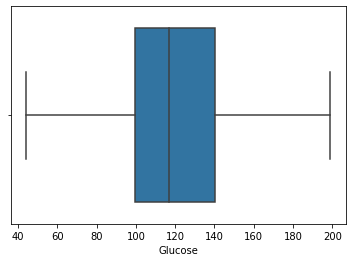

In [14]:
sbs.boxplot(data[dataColumns[1]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


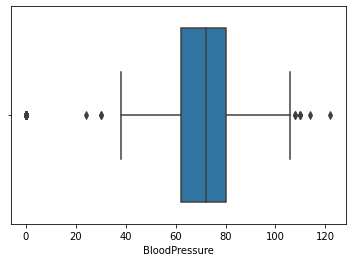

In [15]:
sbs.boxplot(datacpy[dataColumns[2]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


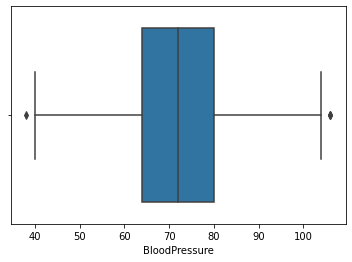

In [16]:
sbs.boxplot(data[dataColumns[2]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


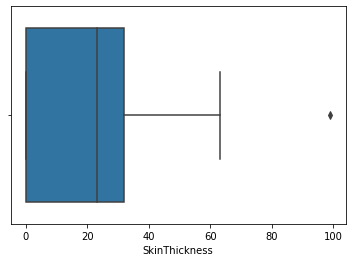

In [17]:
sbs.boxplot(datacpy[dataColumns[3]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


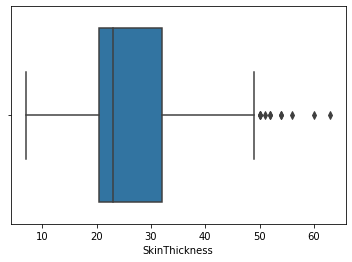

In [18]:
sbs.boxplot(data[dataColumns[3]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


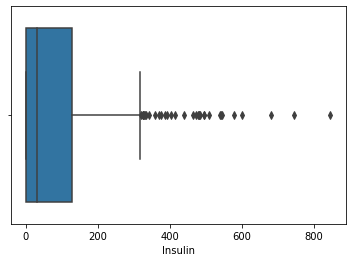

In [19]:
sbs.boxplot(datacpy[dataColumns[4]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


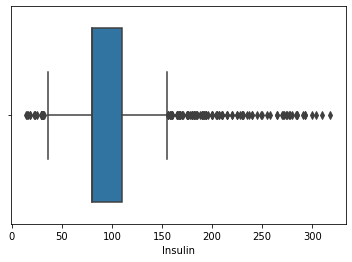

In [20]:
sbs.boxplot(data[dataColumns[4]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


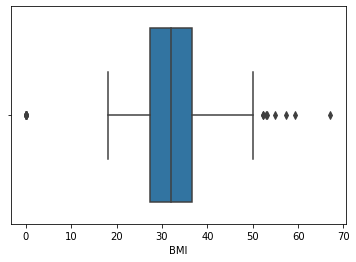

In [21]:
sbs.boxplot(datacpy[dataColumns[5]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


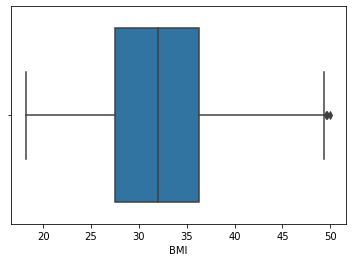

In [22]:
sbs.boxplot(data[dataColumns[5]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


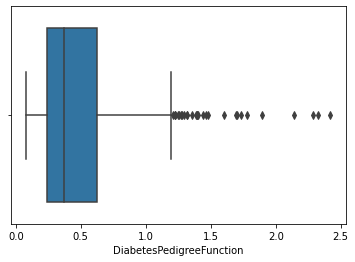

In [23]:
sbs.boxplot(datacpy[dataColumns[6]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


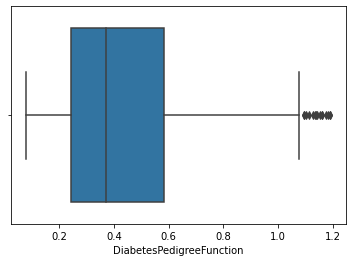

In [24]:
sbs.boxplot(data[dataColumns[6]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


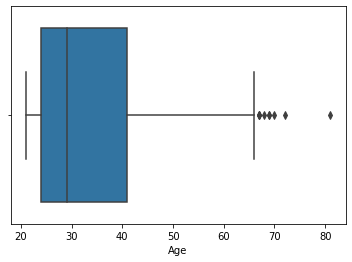

In [25]:
sbs.boxplot(datacpy[dataColumns[7]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


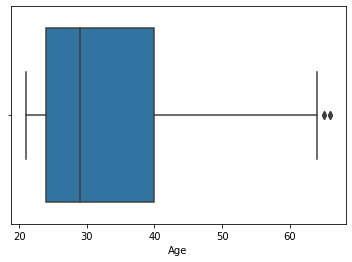

In [26]:
sbs.boxplot(data[dataColumns[7]])

In [27]:
diabetes_true_count = len(data.loc[data['Outcome'] == 1])
diabetes_false_count = len(data.loc[data['Outcome'] == 0])

In [28]:
print("Data having diabetes: " ,  diabetes_true_count)
print("Data not having diabetest: d" ,diabetes_false_count)

Data having diabetes:  268
Data not having diabetest: d 500


In [29]:
# checking values which are 0:
df=data
print("total number of rows : {0}".format(len(df)))
print("number of rows missing Glucose: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("number of rows missing insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(df.loc[df['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing age: {0}".format(len(df.loc[df['Age'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))

total number of rows : 768
number of rows missing Glucose: 0
number of rows missing BloodPressure: 0
number of rows missing insulin: 0
number of rows missing bmi: 0
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing age: 0
number of rows missing SkinThickness: 0


##  **start** **to** **create** **and** **train** **model**

In [30]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [31]:
classifier=Sequential()
classifier.add(Dense(units=64,activation='relu'))
classifier.add(Dense(units=32,activation='relu'))
classifier.add(Dense(units=16,activation='relu'))
classifier.add(Dense(units=8,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
classifier.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])


In [32]:
X = data[dataColumns[0:8]]
y = data['Outcome'].values
# note that x and y now are numpy arr x is data and y is label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((614, 8), (154, 8))

In [33]:
Xz = datacpy[dataColumns[0:8]]
yz = datacpy['Outcome'].values
# note that x and y now are numpy arr x is data and y is label
X_trainz, X_testz, y_trainz, y_testz = train_test_split(Xz, yz, test_size=0.2, random_state=42)

X_trainz.shape, X_testz.shape

((614, 8), (154, 8))

In [34]:
history=classifier.fit(X_train, y_train, epochs=10,  validation_data=(X_test, y_test))

Epoch 1/10
20/20 [==============================] - 1s 23ms/step - loss: 1.3195 - accuracy: 0.6173 - val_loss: 0.6635 - val_accuracy: 0.6753
Epoch 2/10
20/20 [==============================] - 0s 7ms/step - loss: 0.6331 - accuracy: 0.6840 - val_loss: 0.6754 - val_accuracy: 0.6688
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.6051 - accuracy: 0.7020 - val_loss: 0.6443 - val_accuracy: 0.6753
Epoch 4/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5828 - accuracy: 0.7052 - val_loss: 0.6192 - val_accuracy: 0.6688
Epoch 5/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5810 - accuracy: 0.7231 - val_loss: 0.6135 - val_accuracy: 0.7078
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5777 - accuracy: 0.7068 - val_loss: 0.6144 - val_accuracy: 0.6948
Epoch 7/10
20/20 [==============================] - 0s 8ms/step - loss: 0.5677 - accuracy: 0.7117 - val_loss: 0.6505 - val_accuracy: 0.6948
Epoch 8/10
20/20 [=

5/5 - 0s - loss: 0.6305 - accuracy: 0.6818 - 38ms/epoch - 8ms/step


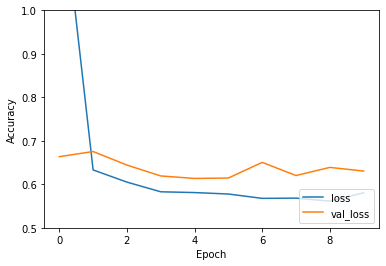

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = classifier.evaluate(X_test,  y_test, verbose=2)

(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f39b9bf6cd0>,
       dtype=object))

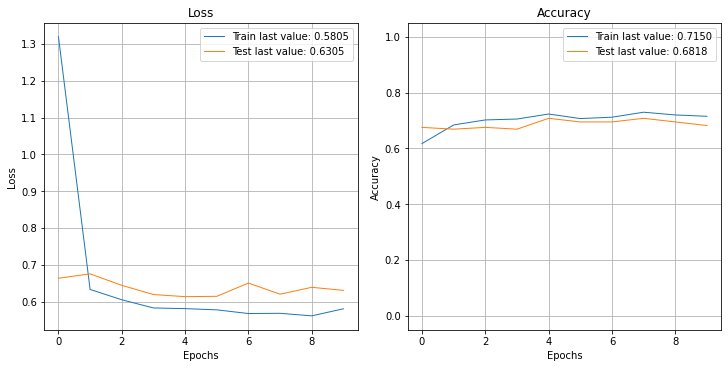

In [36]:

from plot_keras_history import show_history, plot_history
plot_history(history)

In [37]:
print(test_acc)

0.6818181872367859


In [38]:
classifier.save('diabetes_detection.h5')

In [41]:
from keras.models import load_model

Pregnancies= 4
Glucose = 200
BloodPressure = 75
SkinThickness = 45
Insulin=300
BMI=22.58
DiabetesPedigreeFunction=0.675
Age=22
data=[[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]]
model=load_model('diabetes_detection.h5')
prediction=classifier.predict(data)

In [42]:
print(prediction)

[[0.90705395]]
